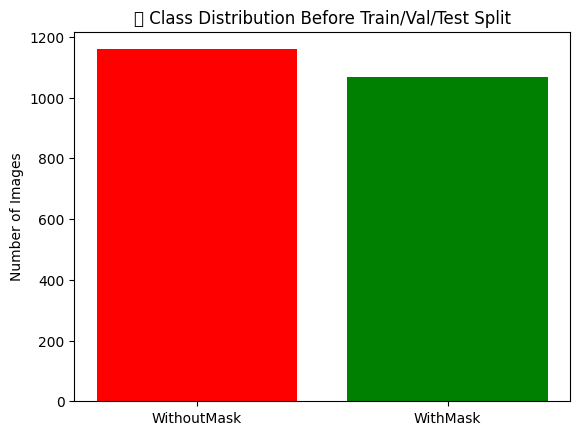

Overall class counts before split: {'WithoutMask': 1159, 'WithMask': 1068}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


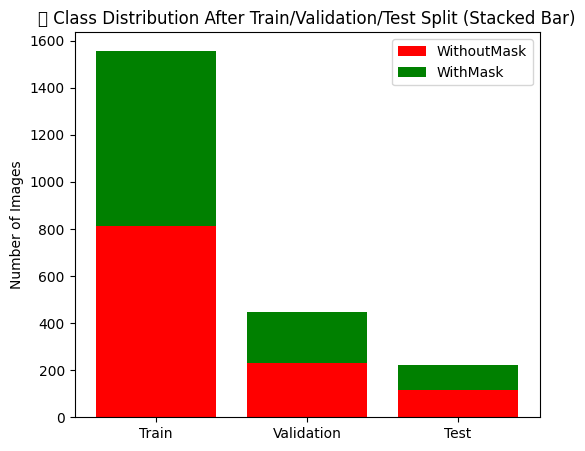

Train split counts (WithoutMask, WithMask): [811, 747]
Validation split counts (WithoutMask, WithMask): [232, 214]
Test split counts (WithoutMask, WithMask): [116, 107]

✅ Shapes after loading: 
X_train: (1558, 224, 224, 3) 
X_val: (446, 224, 224, 3) 
X_test: (223, 224, 224, 3)


In [8]:
# Import necessary librarioes

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import zipfile

# Define paths

shuffled_path = "/kaggle/input/finashuffleddataset"  # input from Step 4
split_path = "/kaggle/working/TrainValTestSplit"
os.makedirs(split_path, exist_ok=True)

# Label mapping

labels_map = {"WithoutMask": 0, "WithMask": 1}


# Load all .npy file paths and corresponding labels
all_files, all_labels = [], []

for category in os.listdir(shuffled_path):
    folder = os.path.join(shuffled_path, category)
    files = [f for f in os.listdir(folder) if f.endswith(".npy")]
    all_files.extend([os.path.join(folder, f) for f in files])
    all_labels.extend([labels_map[category]] * len(files))

all_files = np.array(all_files)
all_labels = np.array(all_labels)


# Plot class distribution before splitting

unique, counts = np.unique(all_labels, return_counts=True)
plt.bar(["WithoutMask", "WithMask"], counts, color=['red', 'green'])
plt.title("📊 Class Distribution Before Train/Val/Test Split")
plt.ylabel("Number of Images")
plt.show()
print("Overall class counts before split:", dict(zip(["WithoutMask", "WithMask"], counts)))


# Split data into Train, Validation and Test

X_temp, X_test, y_temp, y_test = train_test_split(
    all_files, all_labels, test_size=0.1, stratify=all_labels, random_state=42
)

val_ratio = 0.2 / (0.7 + 0.2)  
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_ratio, stratify=y_temp, random_state=42
)

# Create directory structure and copy files into Train/Val/Test folders

splits = {
    "Train": (X_train, y_train),
    "Validation": (X_val, y_val),
    "Test": (X_test, y_test)
}

for split_name, (files, labels) in splits.items():
    for category in labels_map.keys():
        os.makedirs(os.path.join(split_path, split_name, category), exist_ok=True)

    for file, label in zip(files, labels):
        category = "WithoutMask" if label == 0 else "WithMask"
        dst_folder = os.path.join(split_path, split_name, category)
        shutil.copy(file, os.path.join(dst_folder, os.path.basename(file)))

# Function to load .npy data into memory

def load_images(file_paths):
    return np.array([np.load(fp) for fp in file_paths])

# Load actual image data for training/validation/testing
X_train_data = load_images(X_train)
X_val_data   = load_images(X_val)
X_test_data  = load_images(X_test)


y_train_data = y_train
y_val_data   = y_val
y_test_data  = y_test

# Plot class distribution after split using stacked bar chart

train_counts = [np.sum(y_train==0), np.sum(y_train==1)]
val_counts   = [np.sum(y_val==0), np.sum(y_val==1)]
test_counts  = [np.sum(y_test==0), np.sum(y_test==1)]

plt.figure(figsize=(6,5))
plt.bar("Train", train_counts[0], color='red', label='WithoutMask')
plt.bar("Train", train_counts[1], bottom=train_counts[0], color='green', label='WithMask')

plt.bar("Validation", val_counts[0], color='red')
plt.bar("Validation", val_counts[1], bottom=val_counts[0], color='green')

plt.bar("Test", test_counts[0], color='red')
plt.bar("Test", test_counts[1], bottom=test_counts[0], color='green')

plt.title("📊 Class Distribution After Train/Validation/Test Split (Stacked Bar)")
plt.ylabel("Number of Images")
plt.legend()
plt.show()

# Print final statistics

print("Train split counts (WithoutMask, WithMask):", train_counts)
print("Validation split counts (WithoutMask, WithMask):", val_counts)
print("Test split counts (WithoutMask, WithMask):", test_counts)
print("\n✅ Shapes after loading:",
      "\nX_train:", X_train_data.shape,
      "\nX_val:", X_val_data.shape,
      "\nX_test:", X_test_data.shape)

In [9]:
zip_path = "/kaggle/working/TrainValTestSplit.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(split_path):
        for file in files:
            abs_path = os.path.join(root, file)
            rel_path = os.path.relpath(abs_path, split_path)
            zipf.write(abs_path, rel_path)

print(f"\n Train/Validation/Test split dataset saved at: {zip_path}")


 Train/Validation/Test split dataset saved at: /kaggle/working/TrainValTestSplit.zip
